#Sentiment Analysis on YouTube Titles
We performed sentiment analysis on YouTube video titles to identify which types of titles generate the most views. We used two models for this analysis: VADER and NRCLex.

VADER is rule-based model that classifies text into positive, negative, and neutral categories. It takes sentences as input, making it sensitive to capitalization and punctuation.

Next, we experimented with the NRCLex model, which assesses the polarity of titles as positive or negative. Additionally, NRCLex can detect distinct class emotions. It recognizes eight emotions—joy, trust, fear, disgust, surprise, sadness, anger, and anticipation—each with an emotion valence polarity score.

###Importing data and libraries

In [1]:
import pandas as pd
import numpy as np

In [3]:
youtube_data = pd.read_csv('/content/video_data_processed.csv')
youtube_data.head()

,Title,ID,Published_date,Tags,Views,Likes,Comments,Duration,Captoins,likeRatio,commentRatio
0,Why Your Cat Looks Like That: Genetics: Crash ...,YnJPbphsoMY,2024-02-20 17:00:21,"['vlogbrothers', 'Crash Course', 'crashcourse'...",32963,1416,24,708.0,True,42.957255,0.728089
1,Black American History Arts & Culture | Compil...,bfH3fkIsc5U,2024-02-16 16:30:06,"['vlogbrothers', 'Crash Course', 'crashcourse'...",16596,666,27,4393.0,True,40.130152,1.626898
2,Why Are All Humans Unique? Meiosis: Crash Cour...,pj1oFx42d48,2024-02-13 17:00:39,"['vlogbrothers', 'Crash Course', 'crashcourse'...",45926,1394,36,770.0,True,30.353177,0.783870
3,Mitosis and the Cell Cycle: Crash Course Biolo...,skPOXcVvS5c,2024-02-06 17:00:44,"['vlogbrothers', 'Crash Course', 'crashcourse'...",47789,1338,14,671.0,True,27.998075,0.292954
4,Photosynthesis: The Original Solar Power: Cras...,-ZRsLhaukn8,2024-01-30 17:00:00,"['vlogbrothers', 'Crash Course', 'crashcourse'...",52459,1185,26,784.0,True,22.589070,0.495625


#Performing Sentiment Anaysis on video titles using Vader

In [4]:
#Importing libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

#expressed in social media-text sentiment analysis-cases where the text reflects opinions and sentiments
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
def sentiment_analyser(doc):
#making long string from each token
  # doc = ' '.join(word for word in doc)
  sid = SentimentIntensityAnalyzer()
  output = sid.polarity_scores(doc)
  sentiment = output['compound']
  return sentiment

youtube_data['sentiment'] = youtube_data['Title'].apply(lambda x: sentiment_analyser(str(x)))


In [6]:
#no null values
#youtube_data['sentiment'].isna().unique()

In [7]:
def polarity_detector(score):
  if score < 0:
    return 'negative'
  elif score > 0:
    return 'positive'
  else:
    return 'neutral'

In [8]:
#labelling username and name polarity
youtube_data['sentiment_polarity'] = youtube_data['sentiment'].apply(lambda x: polarity_detector(x))

#Tokenization of titles for nlp visualization and analysis.

NRCLex model requires a tokenized sentence as input, So the titles were tokenized. We will generate two versions of the tokenized titles: one retaining stopwords for data analysis purposes and another excluding stopwords for clearer data visualization.

In [9]:
!pip install spacy
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
import spacy
nlp = spacy.load('en_core_web_lg')
print("Model loaded successfully!")


Model loaded successfully!


In [11]:
#Importing libraries
%time
from spacy.tokenizer import Tokenizer
import html
from html.parser import HTMLParser
import re

#loading spacy encore model - need pip install it and restart runtime
nlp = spacy.load('en_core_web_lg')
tokenizer = Tokenizer(nlp.vocab)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


In [12]:
def token_text(doc):
  '''
  formatting as non html for visualisation
  keep only characters
  tokenise sentence into words if those words are not punctuation, pronouns or stop words
  '''
  doc = html.parser.unescape(doc) #remove html
  doc = re.sub(r'[^a-zA-Z ^0-9]', '', doc) #keep alphanumerical characters
  doc = re.sub('[0-9]+', '', doc) #remove numerical characters
  doc = doc.lower() #convert all strings to lowercase
  tokens = [token.text for token in tokenizer(doc)  if (token.is_punct == False) and (token.is_stop == False)]
  tokens = [''.join(x.split()) for x in tokens if x] #remove multiple random number leading spaces from each token in a doc
  tokens = [token for token in tokens if token != ''] #remove empty string from leading edges
  return tokens


In [13]:
def wrangle(X):

  ''' wrangle function creates tokenised version of titles'''

  X['tokenised_title'] = X[X.columns[X.columns.to_series().str.contains('Title')]].iloc[:, 0].apply(lambda x : token_text(str(x)))

  return X


In [14]:
def token_text_with_stopwords(doc):
  '''
  tokenising for NLP purposes
  formatting as non html for visualisation
  keep only characters
  tokenise sentence into words if those words are not punctuation, pronouns or stop words
  remove potential leading spaces
  '''

  doc = html.parser.unescape(doc) #remove html
  doc = re.sub(r'[^a-zA-Z ^0-9]', '', doc) #keep alphanumerical characters
  doc = re.sub('[0-9]+', '', doc) #remove numerical characters
  doc = doc.lower() #convert all strings to lowercase
  tokens = [token.text for token in tokenizer(doc)  if (token.is_punct == False) ]
  tokens = [''.join(x.split()) for x in tokens if x] #remove multiple random number leading spaces from each token in a doc
  tokens = [token for token in tokens if token != ''] #remove empty string from leading edges

  return tokens


In [15]:
youtube_data = wrangle(youtube_data)

In [16]:
#tokenising titles and keeping stopwords
youtube_data['tokenised_titles_with_stopwords'] = youtube_data['Title'].apply(lambda x : token_text_with_stopwords(str(x)))

In [17]:
print(youtube_data.shape)

(1515, 15)


In [18]:
youtube_data.head()

,Title,ID,Published_date,Tags,Views,Likes,Comments,Duration,Captoins,likeRatio,commentRatio,sentiment,sentiment_polarity,tokenised_title,tokenised_titles_with_stopwords
0,Why Your Cat Looks Like That: Genetics: Crash ...,YnJPbphsoMY,2024-02-20 17:00:21,"['vlogbrothers', 'Crash Course', 'crashcourse'...",32963,1416,24,708.0,True,42.957255,0.728089,-0.0516,negative,"[cat, looks, like, genetics, crash, course, bi...","[why, your, cat, looks, like, that, genetics, ..."
1,Black American History Arts & Culture | Compil...,bfH3fkIsc5U,2024-02-16 16:30:06,"['vlogbrothers', 'Crash Course', 'crashcourse'...",16596,666,27,4393.0,True,40.130152,1.626898,0.0000,neutral,"[black, american, history, arts, culture, comp...","[black, american, history, arts, culture, comp..."
2,Why Are All Humans Unique? Meiosis: Crash Cour...,pj1oFx42d48,2024-02-13 17:00:39,"['vlogbrothers', 'Crash Course', 'crashcourse'...",45926,1394,36,770.0,True,30.353177,0.783870,-0.4019,negative,"[humans, unique, meiosis, crash, course, biology]","[why, are, all, humans, unique, meiosis, crash..."
3,Mitosis and the Cell Cycle: Crash Course Biolo...,skPOXcVvS5c,2024-02-06 17:00:44,"['vlogbrothers', 'Crash Course', 'crashcourse'...",47789,1338,14,671.0,True,27.998075,0.292954,-0.4019,negative,"[mitosis, cell, cycle, crash, course, biology]","[mitosis, and, the, cell, cycle, crash, course..."
4,Photosynthesis: The Original Solar Power: Cras...,-ZRsLhaukn8,2024-01-30 17:00:00,"['vlogbrothers', 'Crash Course', 'crashcourse'...",52459,1185,26,784.0,True,22.589070,0.495625,-0.1027,negative,"[photosynthesis, original, solar, power, crash...","[photosynthesis, the, original, solar, power, ..."


#Emotion Detection in titles using NRCLex

The NRC Emotion Lexicon is a list of English words and their associations with eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (positive and negative).



In [19]:
!pip install NRCLex
!python -m textblob.download_corpora

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=53ef337d3748a1891d6ac6b605c42ca55e4ba2fb85364d99157936769f391f74
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built NRCLex
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloa

In [20]:
youtube_data.columns.values

array(['Title', 'ID', 'Published_date', 'Tags', 'Views', 'Likes',
       'Comments', 'Duration', 'Captoins', 'likeRatio', 'commentRatio',
       'sentiment', 'sentiment_polarity', 'tokenised_title',
       'tokenised_titles_with_stopwords'], dtype=object)

In [21]:
from nrclex import NRCLex

def emotion_detector(doc):
  ''' detects emotion in each word of a title using NRCLex'''

  try:
    #detecting emotion for each word
    #doc = eval(doc)
    all_emotions  = [NRCLex(i).affect_frequencies for i in doc]

    # 1-converts each dictionary of emotions into a pandas DataFrame
    # 2-assigns i index to each DataFrame, which corresponds to the position of the word in the original document.
    all_emotions = [pd.DataFrame(df, index=[i]) for i, df in enumerate(all_emotions)]

    #getting max emotion from words
    all_emotions = dict(pd.concat(all_emotions).max())
    return all_emotions
  except:
    pass


In [22]:
#computing emotion detection using NRCLex on titles
youtube_data['emotion'] = youtube_data['tokenised_title'].apply(lambda x: emotion_detector(x))

In [23]:
emotion_list = []

for item in youtube_data['emotion'].tolist():
    if isinstance(item, str):
        try:
            # Safely evaluate strings that represent dictionaries
            item = ast.literal_eval(item)
            emotion_list.append(item)
        except Exception as e:
            print("Failed to literal_eval:", item, "Error:", e)
    elif isinstance(item, dict):
        # Directly append dictionaries
        emotion_list.append(item)
    else:
        print("Unsupported type:", type(item), "Item:", item)


In [24]:
type(emotion_list)

list

In [25]:
#emotion_list = []

#preprocessing emotion list to handle potential errors
#for i in youtube_data['emotion'].tolist():
 # try:
    #i = eval(i)
  #  emotion_list.append(i)
  #except:
   # continue

#formatting all the emotion dictionaries as dataframes
df_emotions_holder = [pd.DataFrame(df, index=[i]) for i, df in enumerate(emotion_list)]
#cocatenating all the mini dataframes
emotions = pd.concat(df_emotions_holder)
emotion_list

[{'fear': 0.25,
  'anger': 0.0,
  'anticip': 0.0,
  'trust': 0.0,
  'surprise': 0.25,
  'positive': 0.0,
  'negative': 0.25,
  'sadness': 0.25,
  'disgust': 0.0,
  'joy': 0.0},
 {'fear': 0.0,
  'anger': 0.0,
  'anticip': 0.0,
  'trust': 0.0,
  'surprise': 0.0,
  'positive': 1.0,
  'negative': 0.5,
  'sadness': 0.5,
  'disgust': 0.0,
  'joy': 0.0},
 {'fear': 0.25,
  'anger': 0.0,
  'anticip': 0.0,
  'trust': 0.0,
  'surprise': 0.5,
  'positive': 0.5,
  'negative': 0.25,
  'sadness': 0.25,
  'disgust': 0.0,
  'joy': 0.0},
 {'fear': 0.25,
  'anger': 0.0,
  'anticip': 0.0,
  'trust': 0.0,
  'surprise': 0.25,
  'positive': 0.0,
  'negative': 0.25,
  'sadness': 0.25,
  'disgust': 0.0,
  'joy': 0.0},
 {'fear': 0.25,
  'anger': 0.0,
  'anticip': 0.0,
  'trust': 0.0,
  'surprise': 0.25,
  'positive': 0.0,
  'negative': 0.25,
  'sadness': 0.25,
  'disgust': 0.0,
  'joy': 0.0},
 {'fear': 0.25,
  'anger': 0.0,
  'anticip': 0.0,
  'trust': 0.0,
  'surprise': 0.25,
  'positive': 0.0,
  'negative': 0

In [26]:
emotions

,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,0.25,0.000000,0.0,0.0,0.25,0.000000,0.25,0.25,0.0,0.0,NaN
1,0.00,0.000000,0.0,0.0,0.00,1.000000,0.50,0.50,0.0,0.0,NaN
2,0.25,0.000000,0.0,0.0,0.50,0.500000,0.25,0.25,0.0,0.0,NaN
3,0.25,0.000000,0.0,0.0,0.25,0.000000,0.25,0.25,0.0,0.0,NaN
4,0.25,0.000000,0.0,0.0,0.25,0.000000,0.25,0.25,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1510,0.25,0.000000,0.0,0.0,0.25,0.000000,0.25,0.25,0.0,0.0,NaN
1511,0.25,0.000000,0.0,0.5,0.25,0.500000,0.25,0.25,0.0,0.0,NaN
1512,0.25,0.000000,0.0,0.0,0.25,0.000000,0.25,0.25,0.0,0.0,NaN
1513,0.25,0.142857,0.0,0.0,0.25,0.142857,0.25,0.25,0.0,0.0,0.142857


In [27]:
print(emotions['fear'].isna().unique())
print(emotions['anger'].isna().unique())
print(emotions['anticip'].isna().unique())
print(emotions['trust'].isna().unique())
print(emotions['surprise'].isna().unique())
print(emotions['positive'].isna().unique())
print(emotions['negative'].isna().unique())
print(emotions['sadness'].isna().unique())
print(emotions['disgust'].isna().unique())
print(emotions['joy'].isna().unique())
print(emotions['anticipation'].isna().unique())


[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[ True False]


In [28]:
#filling na values in anticipation column with 0
emotions_plutchik = emotions.fillna(0)
#emotions_plutchik = emotions_plutchik.replace({0:np.nan, 0:np.nan})

emotions_plutchik

,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,0.25,0.000000,0.0,0.0,0.25,0.000000,0.25,0.25,0.0,0.0,0.000000
1,0.00,0.000000,0.0,0.0,0.00,1.000000,0.50,0.50,0.0,0.0,0.000000
2,0.25,0.000000,0.0,0.0,0.50,0.500000,0.25,0.25,0.0,0.0,0.000000
3,0.25,0.000000,0.0,0.0,0.25,0.000000,0.25,0.25,0.0,0.0,0.000000
4,0.25,0.000000,0.0,0.0,0.25,0.000000,0.25,0.25,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1510,0.25,0.000000,0.0,0.0,0.25,0.000000,0.25,0.25,0.0,0.0,0.000000
1511,0.25,0.000000,0.0,0.5,0.25,0.500000,0.25,0.25,0.0,0.0,0.000000
1512,0.25,0.000000,0.0,0.0,0.25,0.000000,0.25,0.25,0.0,0.0,0.000000
1513,0.25,0.142857,0.0,0.0,0.25,0.142857,0.25,0.25,0.0,0.0,0.142857


In [29]:
emotions_plutchik['anticip'].unique()

array([0.])

In [30]:
emotions_plutchik


,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,0.25,0.000000,0.0,0.0,0.25,0.000000,0.25,0.25,0.0,0.0,0.000000
1,0.00,0.000000,0.0,0.0,0.00,1.000000,0.50,0.50,0.0,0.0,0.000000
2,0.25,0.000000,0.0,0.0,0.50,0.500000,0.25,0.25,0.0,0.0,0.000000
3,0.25,0.000000,0.0,0.0,0.25,0.000000,0.25,0.25,0.0,0.0,0.000000
4,0.25,0.000000,0.0,0.0,0.25,0.000000,0.25,0.25,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1510,0.25,0.000000,0.0,0.0,0.25,0.000000,0.25,0.25,0.0,0.0,0.000000
1511,0.25,0.000000,0.0,0.5,0.25,0.500000,0.25,0.25,0.0,0.0,0.000000
1512,0.25,0.000000,0.0,0.0,0.25,0.000000,0.25,0.25,0.0,0.0,0.000000
1513,0.25,0.142857,0.0,0.0,0.25,0.142857,0.25,0.25,0.0,0.0,0.142857


In [31]:
#dropping columns of emotions not analysied
emotions_plutchik = emotions_plutchik.drop(columns=['anticip', 'positive', 'negative'])

#Visualization of Detected Emotions

In [32]:
!pip install pyplutchik

In [33]:
from pyplutchik import plutchik
import matplotlib.pyplot as plt
from random import uniform
import pyplutchik as pp

import pandas as pd
import numpy as np

In [35]:
youtube_views = pd.read_csv('/content/youtube_data_sentiment.csv')
youtube_views.head()

,Unnamed: 0,Title,ID,Published_date,Tags,Views,Likes,Comments,Duration,Captoins,sentiment,sentiment_polarity,tokenised_title,tokenised_titles_with_stopwords,emotion
0,0,Why Your Cat Looks Like That: Genetics: Crash ...,YnJPbphsoMY,2/20/2024 17:00,"['vlogbrothers', 'Crash Course', 'crashcourse'...",0.002072,0.005684,0.000810,708,1,-0.0516,negative,"['cat', 'looks', 'like', 'genetics', 'crash', ...","['why', 'your', 'cat', 'looks', 'like', 'that'...","{'fear': 0.25, 'anger': 0.0, 'anticip': 0.0, '..."
1,1,Black American History Arts & Culture | Compil...,bfH3fkIsc5U,2/16/2024 16:30,"['vlogbrothers', 'Crash Course', 'crashcourse'...",0.001043,0.002673,0.000911,4393,1,0.0000,neutral,"['black', 'american', 'history', 'arts', 'cult...","['black', 'american', 'history', 'arts', 'cult...","{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
2,2,Why Are All Humans Unique? Meiosis: Crash Cour...,pj1oFx42d48,2/13/2024 17:00,"['vlogbrothers', 'Crash Course', 'crashcourse'...",0.002887,0.005596,0.001215,770,1,-0.4019,negative,"['humans', 'unique', 'meiosis', 'crash', 'cour...","['why', 'are', 'all', 'humans', 'unique', 'mei...","{'fear': 0.25, 'anger': 0.0, 'anticip': 0.0, '..."
3,3,Mitosis and the Cell Cycle: Crash Course Biolo...,skPOXcVvS5c,2/6/2024 17:00,"['vlogbrothers', 'Crash Course', 'crashcourse'...",0.003004,0.005371,0.000473,671,1,-0.4019,negative,"['mitosis', 'cell', 'cycle', 'crash', 'course'...","['mitosis', 'and', 'the', 'cell', 'cycle', 'cr...","{'fear': 0.25, 'anger': 0.0, 'anticip': 0.0, '..."
4,4,Photosynthesis: The Original Solar Power: Cras...,#NAME?,1/30/2024 17:00,"['vlogbrothers', 'Crash Course', 'crashcourse'...",0.003297,0.004757,0.000878,784,1,-0.1027,negative,"['photosynthesis', 'original', 'solar', 'power...","['photosynthesis', 'the', 'original', 'solar',...","{'fear': 0.25, 'anger': 0.0, 'anticip': 0.0, '..."


In [36]:
#dropping few values for which no emotion was returned
youtube_views = youtube_views[youtube_views['emotion'].notna()]

In [37]:
#percentage sentiment_polarity for each sentiment
youtube_views['sentiment_polarity'].value_counts(normalize = True)

sentiment_polarity
negative    0.918812
positive    0.056766
neutral     0.024422
Name: proportion, dtype: float64

In [38]:
youtube_views

,Unnamed: 0,Title,ID,Published_date,Tags,Views,Likes,Comments,Duration,Captoins,sentiment,sentiment_polarity,tokenised_title,tokenised_titles_with_stopwords,emotion
0,0,Why Your Cat Looks Like That: Genetics: Crash ...,YnJPbphsoMY,2/20/2024 17:00,"['vlogbrothers', 'Crash Course', 'crashcourse'...",0.002072,0.005684,0.000810,708,1,-0.0516,negative,"['cat', 'looks', 'like', 'genetics', 'crash', ...","['why', 'your', 'cat', 'looks', 'like', 'that'...","{'fear': 0.25, 'anger': 0.0, 'anticip': 0.0, '..."
1,1,Black American History Arts & Culture | Compil...,bfH3fkIsc5U,2/16/2024 16:30,"['vlogbrothers', 'Crash Course', 'crashcourse'...",0.001043,0.002673,0.000911,4393,1,0.0000,neutral,"['black', 'american', 'history', 'arts', 'cult...","['black', 'american', 'history', 'arts', 'cult...","{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
2,2,Why Are All Humans Unique? Meiosis: Crash Cour...,pj1oFx42d48,2/13/2024 17:00,"['vlogbrothers', 'Crash Course', 'crashcourse'...",0.002887,0.005596,0.001215,770,1,-0.4019,negative,"['humans', 'unique', 'meiosis', 'crash', 'cour...","['why', 'are', 'all', 'humans', 'unique', 'mei...","{'fear': 0.25, 'anger': 0.0, 'anticip': 0.0, '..."
3,3,Mitosis and the Cell Cycle: Crash Course Biolo...,skPOXcVvS5c,2/6/2024 17:00,"['vlogbrothers', 'Crash Course', 'crashcourse'...",0.003004,0.005371,0.000473,671,1,-0.4019,negative,"['mitosis', 'cell', 'cycle', 'crash', 'course'...","['mitosis', 'and', 'the', 'cell', 'cycle', 'cr...","{'fear': 0.25, 'anger': 0.0, 'anticip': 0.0, '..."
4,4,Photosynthesis: The Original Solar Power: Cras...,#NAME?,1/30/2024 17:00,"['vlogbrothers', 'Crash Course', 'crashcourse'...",0.003297,0.004757,0.000878,784,1,-0.1027,negative,"['photosynthesis', 'original', 'solar', 'power...","['photosynthesis', 'the', 'original', 'solar',...","{'fear': 0.25, 'anger': 0.0, 'anticip': 0.0, '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,1510,Water - Liquid Awesome: Crash Course Biology #2,HVT3Y3_gHGg,2/6/2012 22:10,"['water', 'hydrogen', 'oxygen', 'molecule', 'c...",0.315747,0.211316,0.128916,677,1,0.3400,positive,"['water', 'liquid', 'awesome', 'crash', 'cours...","['water', 'liquid', 'awesome', 'crash', 'cours...","{'fear': 0.25, 'anger': 0.0, 'anticip': 0.0, '..."
1511,1511,Indus Valley Civilization: Crash Course World ...,n7ndRwqJYDM,2/2/2012 20:18,"['John Green', 'Crashcourse', 'Documentary', '...",0.516499,0.352803,0.271064,575,1,-0.4019,negative,"['indus', 'valley', 'civilization', 'crash', '...","['indus', 'valley', 'civilization', 'crash', '...","{'fear': 0.25, 'anger': 0.0, 'anticip': 0.0, '..."
1512,1512,Carbon... SO SIMPLE: Crash Course Biology #1,QnQe0xW_JY4,1/30/2012 18:53,"['biology', 'crashcourse', 'gilbert lewis', 'c...",0.502752,0.322127,0.262861,717,1,-0.5683,negative,"['carbon', 'simple', 'crash', 'course', 'biolo...","['carbon', 'so', 'simple', 'crash', 'course', ...","{'fear': 0.25, 'anger': 0.0, 'anticip': 0.0, '..."
1513,1513,The Agricultural Revolution: Crash Course Worl...,Yocja_N5s1I,1/26/2012 20:12,"['John Green', 'history', 'agriculture', 'anci...",1.000000,0.635027,0.412335,671,1,-0.4019,negative,"['agricultural', 'revolution', 'crash', 'cours...","['the', 'agricultural', 'revolution', 'crash',...","{'fear': 0.25, 'anger': 0.14285714285714285, '..."


In [39]:
def emotion_aggregator(emotion):
  '''
  function takes in emotion dictionary
  and returns biggest value of emotion detected in series
  '''
  emotion = eval(emotion)
  del emotion['negative']
  del emotion['positive']
  del emotion['anticip']
  emotion = max(emotion, key=emotion.get)
  return emotion


#computing strongest emotion
youtube_views['strongest_emotion'] = youtube_views['emotion'].apply(lambda x: emotion_aggregator(x))


IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

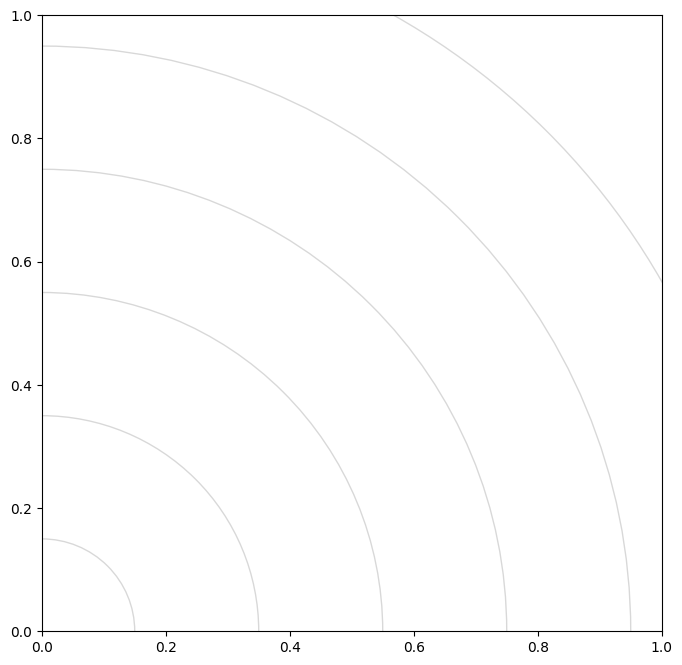

In [40]:
#Must be one of 'joy', 'trust', 'fear', 'surprise', 'sadness', 'disgust', 'anger', 'anticipation'
plutchik(dict(emotions_plutchik.mean()))

Why is fear the most detected emotion? same with my explanation in neg

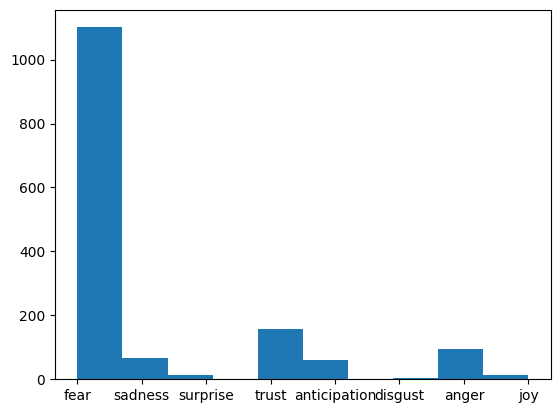

strongest_emotion
fear            1101
trust            158
anger             94
sadness           68
anticipation      61
surprise          14
joy               14
disgust            5
Name: count, dtype: int64

In [41]:
plt.hist(youtube_views['strongest_emotion'])
plt.show()

youtube_views['strongest_emotion'].value_counts()

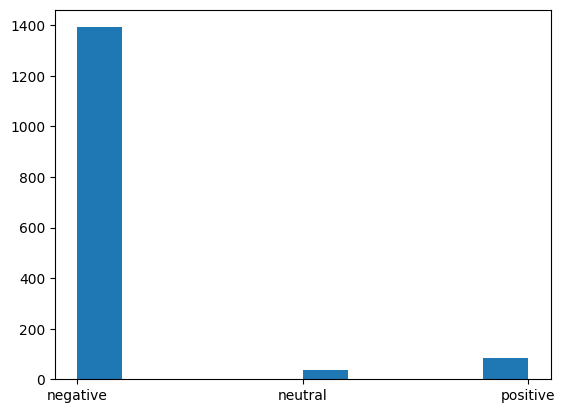

sentiment_polarity
negative    1392
positive      86
neutral       37
Name: count, dtype: int64

In [42]:
plt.hist(youtube_views['sentiment_polarity'])
plt.show()
youtube_views['sentiment_polarity'].value_counts()

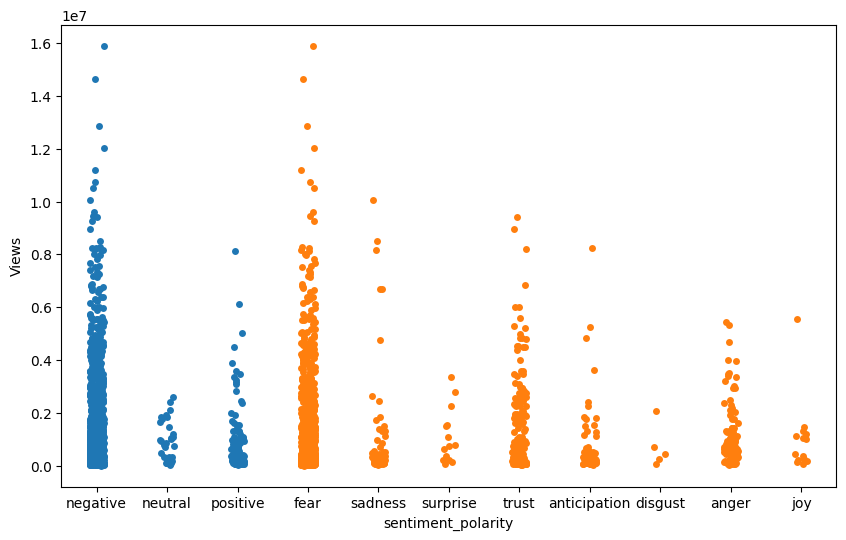

In [45]:
import seaborn as sns
xpolar= youtube_views['sentiment_polarity']
xEmotion= youtube_views['strongest_emotion']

yAx = youtube_data['Views']
plt.figure(figsize=(10, 6))
sns.stripplot(data=youtube_views, x=xpolar, y=yAx)
sns.stripplot(data=youtube_views, x=xEmotion, y=yAx)
plt.show()

###Density Plot
-1 to 1, and the major is -0.5 to -0.25
is it bc we are analyzing titles so there are no strong emotions wether it is positive or negative? we need a more precise model that can analyze the text deeper, but why is it negative? is it bc some videos are about bio so diseases are mention and therefor it is labeled as negative?

<Axes: ylabel='Density'>

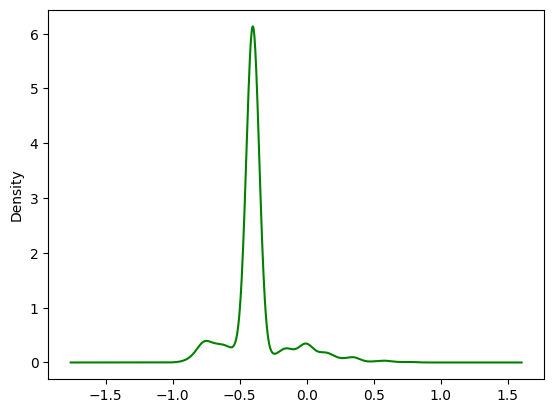

In [46]:
youtube_data.sentiment.plot.density(color='green')

####Refrence:
Ntungila, Jef. (2021). Sentiment Analysis of Social Media Usernames and Titles on YouTube and Twitch (Master Thesis).

[Code to github](https://github.com/JefNtungila/Sentiment-Analysis-of-Usernames-and-Titles-on-YouTube-and-Twitch/blob/main/README.md)